In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd

file_exts = ['.jpg', '.png', '.cr2']

images_paths = [
    '/home/jack/Mounts/RemoteS3/kona_coffee_images/leaves',
]

splits_path = '/home/jack/Mounts/DiskOne/kona_coffee/berries/splits'
box_size = 64

os.makedirs(splits_path, exist_ok=True)

def recursive_list(dir_path, any=False):
    file_list = []
    for root, directories, filenames in os.walk(dir_path):
        for filename in filenames:
            file_path = os.path.join(root, filename)
            if os.path.isfile(file_path):
                if any:
                    file_list.append(file_path)
                elif os.path.splitext(file_path)[1].lower() in file_exts:
                    file_list.append(file_path)
    return file_list

In [2]:
images = [image for path in images_paths for image in recursive_list(path)]

len(images)

316

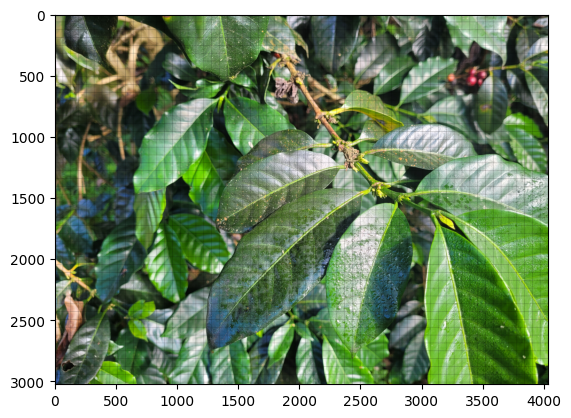

In [3]:
image = images[0]

cv2_img = cv2.imread(image)
cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

# draw grid on image to see where the boxes are

for i in range(0, cv2_img.shape[0], box_size):
    cv2.line(cv2_img, (0, i), (cv2_img.shape[1], i), (0, 0, 0), 1)
for i in range(0, cv2_img.shape[1], box_size):
    cv2.line(cv2_img, (i, 0), (i, cv2_img.shape[0]), (0, 0, 0), 1)

plt.imshow(cv2_img)

In [4]:


for image_path in tqdm(images):
    extention = os.path.splitext(image_path)[1].lower()
    image_name = os.path.basename(image_path)
    
    image = None
    
    if extention == '.jpg' or extention == '.png':
        image = Image.open(image_path)  
    
    elif extention == '.cr2':
        image = Image.open(image_path)
        image = image.convert('RGB')

    splits = []
    width, height = image.size

    for i in range(0, width, box_size):
        for j in range(0, height, box_size):
            box = (i, j, i+box_size, j+box_size)
            new_name = os.path.splitext(image_name)[0] + '_' + str(i) + '_' + str(j) + '.png'
            new_path = os.path.join(splits_path, new_name)

            if os.path.exists(new_path):
                continue

            split = image.crop(box)            
            split.save(new_path)
    
    break

  0%|          | 0/316 [00:04<?, ?it/s]


In [9]:
splits = [os.path.join(splits_path, split) for split in os.listdir(splits_path)]

print(len(splits))

df = pd.DataFrame(splits, columns=['path'])

df

3024


,path
0,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
1,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
2,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
3,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
4,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
...,...
3019,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
3020,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
3021,/home/jack/Mounts/DiskOne/kona_coffee/berries/...
3022,/home/jack/Mounts/DiskOne/kona_coffee/berries/...


In [ ]:
df.to_csv('splits.csv', index=False)